## Project Proposal - Select Graduate Programs with Information Obtained from Google Scholar

### Motivation
Please see my data challenge submittion for details.

### Data Source
Please see my data challenge submittion for details.

### Performed Analysis
* Scholars sorted by their number of citations
The table of In [23] showed the top five scholars with the highest numbers of citations in the field of attention and their affiliations. This analysis can help users to find the most impactful scholars in their field of interest.

* Institutions sorted by the averaged number of citations
The figure of In [28] showed the top five institutions with the highest averaged numbers of citations in the field of attention. This analysis can help users identify the averaged impact of scholars affiliated with a cetain institution.

* Institutions sorted by the number of scholars in the field of interest
The figure of In [25] showed the top five institutions with the highest numbers of scholars in the field of attention. Because collaboration is important for success during PhD, this information will help users to know whether a certain institution has a large group of scholars in their field of interest.

* Other research interests of scholars in the field of interest, sorted by occurence rates
The figure of In [27] showed the top five research topics (or keywords) which the attention scholars are most interested in. This information can help users get a sense about what researchers in their field of interest care about, which are likely to be what they will do in the future. In addition, this information can also help users to identify new topics that they may be interested in, which is especially important for graduate school applicants because they are not very experienced in the field.

### Plan for Future Analysis
Please see my data challenge submittion for details.

In [13]:
# import the modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scholarly

%matplotlib inline

# show a scholar's information obtained by searching for the keyword "Attention", which is a subfield in Cognitive
# Psychology (a subfield in Psychology)
keyword = 'attention'
search_query = scholarly.search_keyword(keyword)
search_query_copy = search_query
print(next(search_query_copy))

{'_filled': False,
 'affiliation': 'Prof Emeritus of psychology  University of Oregon',
 'citedby': 131251,
 'email': '@uoregon.edu',
 'id': '4X4X4xkAAAAJ',
 'interests': ['attention'],
 'name': 'Michael I. Posner',
 'url_picture': '/citations?view_op=small_photo&user=4X4X4xkAAAAJ&citpid=3'}


In [3]:
# show the detailed information of this scholar
author = next(search_query).fill()
print(author)

{'_filled': True,
 'affiliation': 'Washington University',
 'citedby': 73634,
 'cites_per_year': {1990: 203,
                    1991: 357,
                    1992: 519,
                    1993: 634,
                    1994: 778,
                    1995: 1164,
                    1996: 1455,
                    1997: 1221,
                    1998: 1670,
                    1999: 1638,
                    2000: 1841,
                    2001: 1995,
                    2002: 1731,
                    2003: 2263,
                    2004: 2081,
                    2005: 2093,
                    2006: 2292,
                    2007: 2233,
                    2008: 2258,
                    2009: 2406,
                    2010: 2785,
                    2011: 3031,
                    2012: 3660,
                    2013: 4573,
                    2014: 4713,
                    2015: 5352,
                    2016: 5604,
                    2017: 6335,
                    2018: 5576}

In [14]:
# write the scholars' data in a .csv file
import csv
keyword = 'attention'
f = keyword + ".csv"
with open(f, "w") as file1:
    writes = csv.writer(file1, delimiter='\t', quoting=csv.QUOTE_ALL)
    writes.writerows(map(lambda x: [x], search_query))

In [15]:
# read the data from .csv to pandas dataframe
data = pd.read_csv(f, sep = '\t', header = None)
data.columns = ['raw'] # column name of the raw data

In [16]:
# define a function to convert the string to dictionary
import ast

def ConvertDict(s):
    return ast.literal_eval(s)

data['raw_dict'] = data['raw'].apply(ConvertDict)

In [17]:
# show the first line of the column raw_dict and size of data
print(data['raw_dict'][0])
print(len(data))

{'email': '@npg.wustl.edu', 'citedby': 73634, '_filled': False, 'name': 'Steve Petersen', 'url_picture': '/citations/images/avatar_scholar_56.png', 'id': 'rS5gzhcAAAAJ', 'affiliation': 'Washington University', 'interests': ['Cognitive Neuroscience', 'Attention', 'Memory', 'Reading', 'Large scale brain organization']}
1080


In [18]:
# define a function to convert the dictionary to a new dataframe
def ConvertDF(df):
    new = list() # create an empty list
    column_name=['name', 'citedby', 'affiliation', 'email', 'interests', 'url_picture']
    for index, row in df.iterrows():
        if all(key in row['raw_dict'] for key in column_name):  # some samples lack citedby
            temp = {} # create an empty dict
            (temp.update({'affiliation': row['raw_dict']['affiliation'],
                        'name': row['raw_dict']['name'], 
                        'citedby': row['raw_dict']['citedby'],
                        'email': row['raw_dict']['email'],
                        'interests': row['raw_dict']['interests'],
                        'url_picture': row['raw_dict']['url_picture']
                        }))
        
        new.append(temp)
    df_new = pd.DataFrame(new, columns=column_name)
    return df_new

In [19]:
data_new = ConvertDF(data)
display(data_new.head(2))
print(len(data_new))

,name,citedby,affiliation,email,interests,url_picture
0,Steve Petersen,73634,Washington University,@npg.wustl.edu,"[Cognitive Neuroscience, Attention, Memory, Re...",/citations/images/avatar_scholar_56.png
1,Fergus IM Craik,67194,"Rotman Research Institute at Baycrest, Toronto",@research.baycrest.org,"[Attention, memory and cognition, cognitive ag...",/citations?view_op=small_photo&user=sMmxTNcAAA...


1080


In [20]:
# remove the duplicated data
data_new = data_new.drop_duplicates(subset=['name', 'affiliation'], keep=False)
len(data_new)

1044

In [21]:
# define a function to clean the affilication
def CleanAffil(row):
    s = row['affiliation']
    if type(s) == str:
        l = [x.strip() for x in s.replace(';', ',').split(",")] # create a list to store the splited words
        for item in l:
            if any(x in item for x in ['Univ', 'Institute', 'College', 'UC']) and 'Institute of Psychology' not in item :
                return item.replace('Univ.', 'University').replace('\xa0…', '').replace('UC ', 'University of California ')

In [22]:
# create the column with cleaned affiliation information
data_new['affiliation_clean'] = data_new.apply(CleanAffil, axis=1)

In [23]:
# the top five most cited scholars in Attention
data_new.sort_values(by=['citedby'], ascending=False).iloc[:5][['name','citedby','affiliation_clean']]

,name,citedby,affiliation_clean
0,Steve Petersen,73634,Washington University
1,Fergus IM Craik,67194,Rotman Research Institute at Baycrest
2,Arthur Kramer,59446,University of Illinois
3,James Swanson,50082,University of California Irvine
4,Jon Driver (1962-2011),47923,UCL Institute of Cognitive Neuroscience


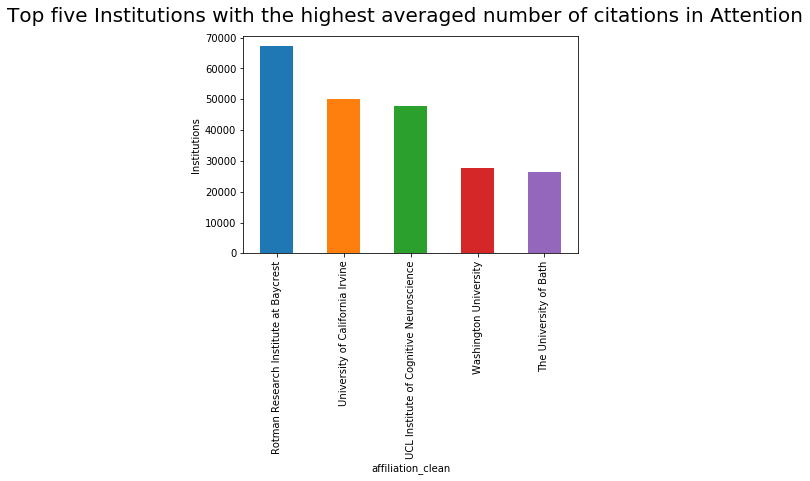

In [28]:
# top five institutions with the highest averaged number of citations in Attention
fig = plt.figure(1)
fig.suptitle("Top five Institutions with the highest averaged number of citations in Attention", fontsize=20)

plt.xlabel("Number of Citations")
plt.ylabel("Institutions")
data_new.groupby('affiliation_clean')['citedby'].mean().sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.show()

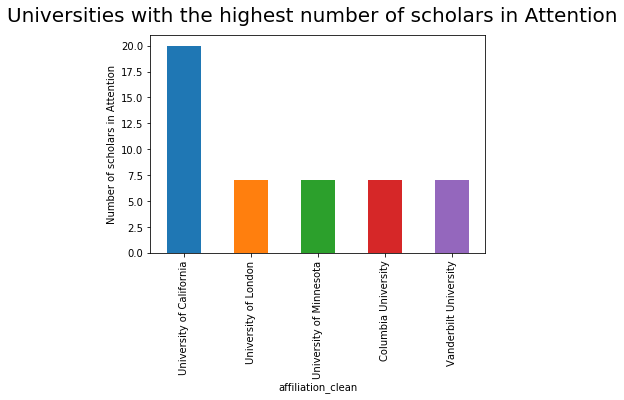

In [25]:
# the top five universities with the highest number of scholars in Attention
fig = plt.figure(2)
fig.suptitle("Universities with the highest number of scholars in Attention", fontsize=20)

plt.xlabel("University")
plt.ylabel("Number of scholars in Attention")
data_new.groupby('affiliation_clean')['name'].nunique().sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.show()

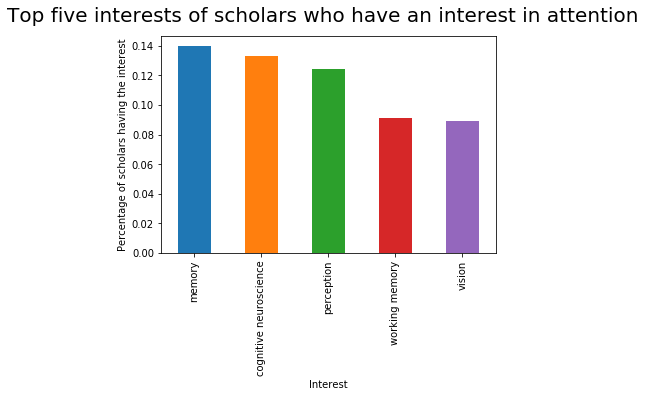

In [27]:
# top five interests of people who have an interest in attention
interest_list = list()
for i in range(len(data_new)):
    interest_list += [x.lower() for x in data_new['interests'][i]]
    
interest_rank = pd.Series(interest_list).value_counts() / len(data_new)

fig = plt.figure(3)
fig.suptitle("Top five interests of scholars who have an interest in attention", fontsize=20)

plt.xlabel("Interest")
plt.ylabel("Percentage of scholars having the interest")
interest_rank.iloc[1:6].plot(kind='bar')
plt.show()